In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('MALARIA.csv')  # Replace with the actual file path

df.head()


,MONTH,WEEK,HUMIDITY,MOSQUITO,SPECIES,MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP,AVG TEMP,MIN TEMP,DEW POINT,PRECIPITATION,RAINY DAYS,WIND,AGE CATEGORY,MALE,FEMALE,LOCATION
0,January,1,78.9,Pv,imported,True,False,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,Chengalpattu
1,January,2,78.9,Pv,indigenious,False,True,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,Tambaram
2,January,3,78.9,Pf,indigenious,False,False,False,True,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,Villupuram
3,January,4,78.9,Pf,imported,False,False,True,False,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,Nagercoil
4,February,1,76.3,Pv,imported,True,False,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,Krishnagiri


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is stored in a variable called 'df'

# Drop unnecessary columns
df = df.drop(['MOSQUITO1', 'MOSQUITO4'], axis=1)
#df = df.drop(['MOSQUITO1', 'MOSQUITO2', 'MOSQUITO3', 'MOSQUITO4'], axis=1)

# Handle missing values if needed

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['MONTH','LOCATION'], drop_first=True)

# Split the data into features (X) and target variables (y)
X = df_encoded.drop(['MOSQUITO', 'SPECIES'], axis=1)
y_mosquito = df_encoded['MOSQUITO']
y_species = df_encoded['SPECIES']

# Split the data into training and testing sets
X_train, X_test, y_mosquito_train, y_mosquito_test, y_species_train, y_species_test = train_test_split(
    X, y_mosquito, y_species, test_size=0.2, random_state=42
)

# Initialize the model (Random Forest Classifier, for example)
model_mosquito = RandomForestClassifier(random_state=42)
model_species = RandomForestClassifier(random_state=42)

# Train the model
model_mosquito.fit(X_train, y_mosquito_train)
model_species.fit(X_train, y_species_train)

# Make predictions
y_mosquito_pred = model_mosquito.predict(X_test)
y_species_pred = model_species.predict(X_test)

# Evaluate the model
accuracy_mosquito = accuracy_score(y_mosquito_test, y_mosquito_pred)
accuracy_species = accuracy_score(y_species_test, y_species_pred)

print(f'Accuracy (MOSQUITO): {accuracy_mosquito}')
print(f'Accuracy (SPECIES): {accuracy_species}')

# You can also print classification reports for more detailed metrics
print("Classification Report (MOSQUITO):\n", classification_report(y_mosquito_test, y_mosquito_pred))
print("Classification Report (SPECIES):\n", classification_report(y_species_test, y_species_pred))



Accuracy (MOSQUITO): 0.7560975609756098
Accuracy (SPECIES): 0.7560975609756098
Classification Report (MOSQUITO):
               precision    recall  f1-score   support

          Pf       0.80      0.73      0.76        66
          Pv       0.71      0.79      0.75        57

    accuracy                           0.76       123
   macro avg       0.76      0.76      0.76       123
weighted avg       0.76      0.76      0.76       123

Classification Report (SPECIES):
               precision    recall  f1-score   support

    imported       0.76      0.78      0.77        64
 indigenious       0.75      0.73      0.74        59

    accuracy                           0.76       123
   macro avg       0.76      0.76      0.76       123
weighted avg       0.76      0.76      0.76       123



Confusion Matrix (MOSQUITO):
 [[48 18]
 [12 45]]
Confusion Matrix (SPECIES):
 [[50 14]
 [16 43]]



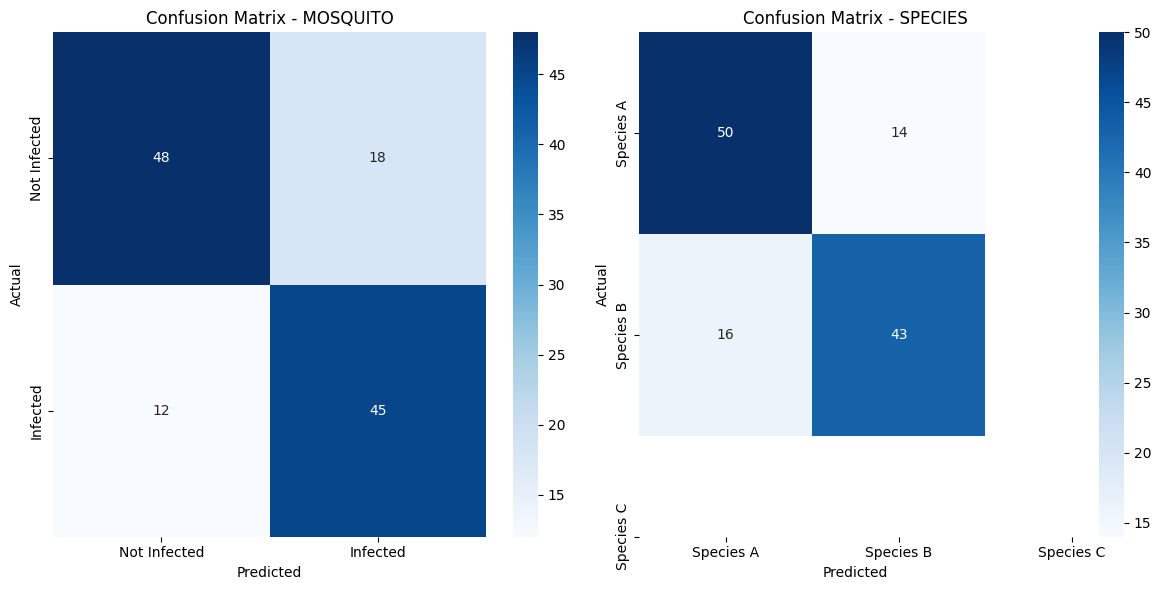

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrices
conf_matrix_mosquito = confusion_matrix(y_mosquito_test, y_mosquito_pred)
conf_matrix_species = confusion_matrix(y_species_test, y_species_pred)

# Display confusion matrices
print("Confusion Matrix (MOSQUITO):\n", conf_matrix_mosquito)
print("Confusion Matrix (SPECIES):\n", conf_matrix_species)

# Visualize confusion matrices with a heatmap
plt.figure(figsize=(12, 6))

# Plot for MOSQUITO
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_mosquito, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Infected', 'Infected'], yticklabels=['Not Infected', 'Infected'])
plt.title('Confusion Matrix - MOSQUITO')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print()
# Plot for SPECIES
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_species, annot=True, fmt='d', cmap='Blues', xticklabels=['Species A', 'Species B', 'Species C'], yticklabels=['Species A', 'Species B', 'Species C'])
plt.title('Confusion Matrix - SPECIES')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# ... (rest of the code)


Tuned version of decision tree

In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('MALARIA.csv')  # Replace with the actual file path

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is stored in a variable called 'df'

# Drop unnecessary columns
df = df.drop(['MOSQUITO1', 'MOSQUITO4'], axis=1)
#df = df.drop(['MOSQUITO1', 'MOSQUITO2', 'MOSQUITO3', 'MOSQUITO4'], axis=1)

# Handle missing values if needed

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['MONTH','LOCATION'], drop_first=True)

# Feature engineering (example: you can add a feature that represents the average temperature range)
df_encoded['AVG_TEMP_RANGE'] = df_encoded['AVG TEMP'] - df_encoded['MIN TEMP']
# Create interaction features
df_encoded['HUMIDITY_TEMP_INTERACTION'] = df_encoded['HUMIDITY'] * df_encoded['AVG TEMP']
df_encoded['TOT_CASES'] = df_encoded['MALE'] + df_encoded['FEMALE']

# Split the data into features (X) and target variables (y)
X = df_encoded.drop(['MOSQUITO', 'SPECIES'], axis=1)
y_mosquito = df_encoded['MOSQUITO']
y_species = df_encoded['SPECIES']

# Split the data into training and testing sets
X_train, X_test, y_mosquito_train, y_mosquito_test, y_species_train, y_species_test = train_test_split(
    X, y_mosquito, y_species, test_size=0.2, random_state=42
)

# Initialize the model (Random Forest Classifier, for example)
model_mosquito = RandomForestClassifier(random_state=42)
model_species = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_mosquito = GridSearchCV(model_mosquito, param_grid, cv=5)
grid_search_species = GridSearchCV(model_species, param_grid, cv=5)

# Fit the models with the best hyperparameters
grid_search_mosquito.fit(X_train, y_mosquito_train)
grid_search_species.fit(X_train, y_species_train)

# Make predictions
y_mosquito_pred = grid_search_mosquito.predict(X_test)
y_species_pred = grid_search_species.predict(X_test)

# Evaluate the model
accuracy_mosquito = accuracy_score(y_mosquito_test, y_mosquito_pred)
accuracy_species = accuracy_score(y_species_test, y_species_pred)

print(f'Accuracy (MOSQUITO): {accuracy_mosquito}')
print(f'Accuracy (SPECIES): {accuracy_species}')

# Print the best hyperparameters for each model
print("Best Hyperparameters (MOSQUITO):", grid_search_mosquito.best_params_)
print("Best Hyperparameters (SPECIES):", grid_search_species.best_params_)

# You can also print classification reports for more detailed metrics
print("Classification Report (MOSQUITO):\n", classification_report(y_mosquito_test, y_mosquito_pred))
print("Classification Report (SPECIES):\n", classification_report(y_species_test, y_species_pred))


Accuracy (MOSQUITO): 0.7479674796747967
Accuracy (SPECIES): 0.8130081300813008
Best Hyperparameters (MOSQUITO): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Hyperparameters (SPECIES): {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Classification Report (MOSQUITO):
               precision    recall  f1-score   support

          Pf       0.78      0.74      0.76        66
          Pv       0.72      0.75      0.74        57

    accuracy                           0.75       123
   macro avg       0.75      0.75      0.75       123
weighted avg       0.75      0.75      0.75       123

Classification Report (SPECIES):
               precision    recall  f1-score   support

    imported       0.81      0.84      0.82        64
 indigenious       0.82      0.78      0.80        59

    accuracy                           0.81       123
   macro avg       0.81      0.81      0.81       123
weighted avg    

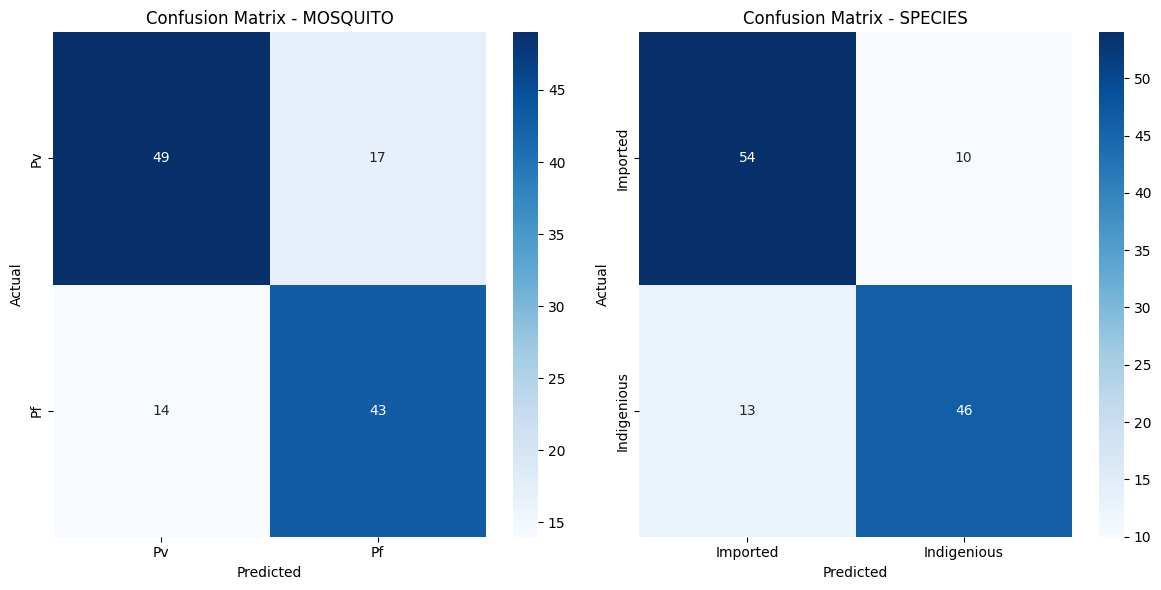

In [ ]:
# Create confusion matrices
conf_matrix_mosquito = confusion_matrix(y_mosquito_test, y_mosquito_pred)
conf_matrix_species = confusion_matrix(y_species_test, y_species_pred)

# Visualize confusion matrices with a heatmap
plt.figure(figsize=(12, 6))

# Plot for MOSQUITO
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_mosquito, annot=True, fmt='d', cmap='Blues', xticklabels=['Pv', 'Pf'], yticklabels=['Pv', 'Pf'])
plt.title('Confusion Matrix - MOSQUITO')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot for SPECIES
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_species, annot=True, fmt='d', cmap='Blues', xticklabels=['Imported','Indigenious'], yticklabels=['Imported','Indigenious'])
plt.title('Confusion Matrix - SPECIES')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


**SVM 1**

In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('MALARIA.csv')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target variables (y)
X = df_encoded.drop(['MOSQUITO', 'SPECIES'], axis=1)
y_mosquito = df_encoded['MOSQUITO']
y_species = df_encoded['SPECIES']

# Split the data into training and testing sets
X_train, X_test, y_mosquito_train, y_mosquito_test, y_species_train, y_species_test = train_test_split(
    X, y_mosquito, y_species, test_size=0.2, random_state=42
)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM for MOSQUITO
svm_mosquito = SVC()
svm_mosquito.fit(X_train_scaled, y_mosquito_train)
y_mosquito_pred = svm_mosquito.predict(X_test_scaled)

# SVM for SPECIES
svm_species = SVC()
svm_species.fit(X_train_scaled, y_species_train)
y_species_pred = svm_species.predict(X_test_scaled)

# Evaluate the performance
accuracy_mosquito = accuracy_score(y_mosquito_test, y_mosquito_pred)
accuracy_species = accuracy_score(y_species_test, y_species_pred)

print(f"Accuracy (MOSQUITO): {accuracy_mosquito}")
print(f"Accuracy (SPECIES): {accuracy_species}")

# Classification Report
print("Classification Report (MOSQUITO):")
print(classification_report(y_mosquito_test, y_mosquito_pred))

print("Classification Report (SPECIES):")
print(classification_report(y_species_test, y_species_pred))


Accuracy (MOSQUITO): 0.4715447154471545
Accuracy (SPECIES): 0.5853658536585366
Classification Report (MOSQUITO):
              precision    recall  f1-score   support

          Pf       0.51      0.33      0.40        66
          Pv       0.45      0.63      0.53        57

    accuracy                           0.47       123
   macro avg       0.48      0.48      0.46       123
weighted avg       0.48      0.47      0.46       123

Classification Report (SPECIES):
              precision    recall  f1-score   support

    imported       0.61      0.58      0.59        64
 indigenious       0.56      0.59      0.58        59

    accuracy                           0.59       123
   macro avg       0.59      0.59      0.59       123
weighted avg       0.59      0.59      0.59       123



**improvement 2**

In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('MALARIA.csv')

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

# Perform GridSearchCV for MOSQUITO
grid_search_mosquito = GridSearchCV(SVC(), param_grid, cv=5)
grid_search_mosquito.fit(X_train_scaled, y_mosquito_train)

# Perform GridSearchCV for SPECIES
grid_search_species = GridSearchCV(SVC(), param_grid, cv=5)
grid_search_species.fit(X_train_scaled, y_species_train)

# Get the best hyperparameters
best_params_mosquito = grid_search_mosquito.best_params_
best_params_species = grid_search_species.best_params_

print(f"Best Hyperparameters (MOSQUITO): {best_params_mosquito}")
print(f"Best Hyperparameters (SPECIES): {best_params_species}")


Best Hyperparameters (MOSQUITO): {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best Hyperparameters (SPECIES): {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# For MOSQUITO
svm_mosquito = SVC(class_weight='balanced')
svm_mosquito.fit(X_train_scaled, y_mosquito_train)

# For SPECIES
svm_species = SVC(class_weight='balanced')
svm_species.fit(X_train_scaled, y_species_train)


SVC(class_weight='balanced')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# For MOSQUITO
rf_mosquito = RandomForestClassifier()
rf_mosquito.fit(X_train_scaled, y_mosquito_train)
y_mosquito_pred = rf_mosquito.predict(X_test_scaled)

# For SPECIES
rf_species = RandomForestClassifier()
rf_species.fit(X_train_scaled, y_species_train)
y_species_pred = rf_species.predict(X_test_scaled)

In [ ]:
# Evaluate the performance
accuracy_mosquito = accuracy_score(y_mosquito_test, y_mosquito_pred)
accuracy_species = accuracy_score(y_species_test, y_species_pred)

print(f"Accuracy (MOSQUITO): {accuracy_mosquito}")
print(f"Accuracy (SPECIES): {accuracy_species}")

# Classification Report
print("Classification Report (MOSQUITO):")
print(classification_report(y_mosquito_test, y_mosquito_pred))

print("Classification Report (SPECIES):")
print(classification_report(y_species_test, y_species_pred))

Accuracy (MOSQUITO): 0.45528455284552843
Accuracy (SPECIES): 0.5121951219512195
Classification Report (MOSQUITO):
              precision    recall  f1-score   support

          Pf       0.49      0.45      0.47        66
          Pv       0.42      0.46      0.44        57

    accuracy                           0.46       123
   macro avg       0.46      0.46      0.45       123
weighted avg       0.46      0.46      0.46       123

Classification Report (SPECIES):
              precision    recall  f1-score   support

    imported       0.53      0.50      0.52        64
 indigenious       0.49      0.53      0.51        59

    accuracy                           0.51       123
   macro avg       0.51      0.51      0.51       123
weighted avg       0.51      0.51      0.51       123



**Logistic regression**

In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('MALARIA.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target variables (y)
X = df_encoded.drop(['MOSQUITO', 'SPECIES'], axis=1)
y_mosquito = df_encoded['MOSQUITO']
y_species = df_encoded['SPECIES']

# Split the data into training and testing sets
X_train, X_test, y_mosquito_train, y_mosquito_test, y_species_train, y_species_test = train_test_split(
    X, y_mosquito, y_species, test_size=0.2, random_state=42
)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression for MOSQUITO
logreg_mosquito = LogisticRegression()
logreg_mosquito.fit(X_train_scaled, y_mosquito_train)
y_mosquito_pred = logreg_mosquito.predict(X_test_scaled)

# Logistic Regression for SPECIES
logreg_species = LogisticRegression()
logreg_species.fit(X_train_scaled, y_species_train)
y_species_pred = logreg_species.predict(X_test_scaled)

# Evaluate the performance
accuracy_mosquito = accuracy_score(y_mosquito_test, y_mosquito_pred)
accuracy_species = accuracy_score(y_species_test, y_species_pred)

print(f"Accuracy (MOSQUITO): {accuracy_mosquito}")
print(f"Accuracy (SPECIES): {accuracy_species}")

# Classification Report
print("Classification Report (MOSQUITO):")
print(classification_report(y_mosquito_test, y_mosquito_pred))

print("Classification Report (SPECIES):")
print(classification_report(y_species_test, y_species_pred))


Accuracy (MOSQUITO): 0.5040650406504065
Accuracy (SPECIES): 0.5284552845528455
Classification Report (MOSQUITO):
              precision    recall  f1-score   support

          Pf       0.56      0.38      0.45        66
          Pv       0.47      0.65      0.55        57

    accuracy                           0.50       123
   macro avg       0.51      0.51      0.50       123
weighted avg       0.52      0.50      0.50       123

Classification Report (SPECIES):
              precision    recall  f1-score   support

    imported       0.57      0.41      0.47        64
 indigenious       0.51      0.66      0.57        59

    accuracy                           0.53       123
   macro avg       0.54      0.53      0.52       123
weighted avg       0.54      0.53      0.52       123



**Tunning logistic regression**

In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('MALARIA.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target variables (y)
X = df_encoded.drop(['MOSQUITO', 'SPECIES'], axis=1)
y_mosquito = df_encoded['MOSQUITO']
y_species = df_encoded['SPECIES']

# Split the data into training and testing sets
X_train, X_test, y_mosquito_train, y_mosquito_test, y_species_train, y_species_test = train_test_split(
    X, y_mosquito, y_species, test_size=0.2, random_state=42
)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression for MOSQUITO with hyperparameter tuning
param_grid_mosquito = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_mosquito = GridSearchCV(LogisticRegression(), param_grid_mosquito, cv=5)
grid_search_mosquito.fit(X_train_scaled, y_mosquito_train)

# Logistic Regression for SPECIES with hyperparameter tuning
param_grid_species = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_species = GridSearchCV(LogisticRegression(), param_grid_species, cv=5)
grid_search_species.fit(X_train_scaled, y_species_train)

# Get the best hyperparameters
best_params_mosquito = grid_search_mosquito.best_params_
best_params_species = grid_search_species.best_params_

print(f"Best Hyperparameters (MOSQUITO): {best_params_mosquito}")
print(f"Best Hyperparameters (SPECIES): {best_params_species}")

# Use the best models
logreg_mosquito = grid_search_mosquito.best_estimator_
logreg_species = grid_search_species.best_estimator_

# Predictions
y_mosquito_pred = logreg_mosquito.predict(X_test_scaled)
y_species_pred = logreg_species.predict(X_test_scaled)

# Evaluate the performance
accuracy_mosquito = accuracy_score(y_mosquito_test, y_mosquito_pred)
accuracy_species = accuracy_score(y_species_test, y_species_pred)

print(f"Accuracy (MOSQUITO): {accuracy_mosquito}")
print(f"Accuracy (SPECIES): {accuracy_species}")

# Classification Report
print("Classification Report (MOSQUITO):")
print(classification_report(y_mosquito_test, y_mosquito_pred))

print("Classification Report (SPECIES):")
print(classification_report(y_species_test, y_species_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters (MOSQUITO): {'C': 0.001}
Best Hyperparameters (SPECIES): {'C': 0.1}
Accuracy (MOSQUITO): 0.5040650406504065
Accuracy (SPECIES): 0.5447154471544715
Classification Report (MOSQUITO):
              precision    recall  f1-score   support

          Pf       0.63      0.18      0.28        66
          Pv       0.48      0.88      0.62        57

    accuracy                           0.50       123
   macro avg       0.56      0.53      0.45       123
weighted avg       0.56      0.50      0.44       123

Classification Report (SPECIES):
              precision    recall  f1-score   support

    imported       0.59      0.42      0.49        64
 indigenious       0.52      0.68      0.59        59

    accuracy                           0.54       123
   macro avg       0.55      0.55      0.54       123
weighted avg       0.55      0.54      0.54       123



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**KNN**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('MALARIA.csv')

# Drop specified columns
#df = df.drop(['MOSQUITO1', 'MOSQUITO2', 'MOSQUITO3', 'MOSQUITO4'], axis=1)

# Encode categorical variables
le = LabelEncoder()
df['MOSQUITO'] = le.fit_transform(df['MOSQUITO'])
df['SPECIES'] = le.fit_transform(df['SPECIES'])

# Split the data into features (X) and target variables (y)
X = df.drop(['MOSQUITO', 'SPECIES'], axis=1)
y_mosquito = df['MOSQUITO']
y_species = df['SPECIES']

# Encode categorical variables
X_encoded = pd.get_dummies(X, columns=['MONTH', 'LOCATION', 'AGE CATEGORY'])

# Identify non-numeric columns
non_numeric_cols = X_encoded.select_dtypes(exclude=['float64', 'int64']).columns

# Handle missing values only for numeric columns
numeric_cols = X_encoded.columns.difference(non_numeric_cols)
imputer = SimpleImputer(strategy='mean')
X_encoded[numeric_cols] = imputer.fit_transform(X_encoded[numeric_cols])

# Split the data into training and testing sets
X_train, X_test, y_mosquito_train, y_mosquito_test, y_species_train, y_species_test = train_test_split(
    X_encoded, y_mosquito, y_species, test_size=0.2, random_state=42
)

# Apply SMOTE for oversampling (if needed)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled_mosquito, y_mosquito_train_resampled = smote.fit_resample(X_train, y_mosquito_train)
X_train_resampled_species, y_species_train_resampled = smote.fit_resample(X_train, y_species_train)

# Standardize features for mosquito
scaler = StandardScaler()
X_train_resampled_scaled_mosquito = scaler.fit_transform(X_train_resampled_mosquito)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors for mosquito
grid_search_knn_mosquito = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn_mosquito.fit(X_train_resampled_scaled_mosquito, y_mosquito_train_resampled)

# Standardize features for species
X_train_resampled_scaled_species = scaler.fit_transform(X_train_resampled_species)

# K-Nearest Neighbors for species
grid_search_knn_species = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn_species.fit(X_train_resampled_scaled_species, y_species_train_resampled)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [ ]:
# Evaluate KNN models
def evaluate_model(model, X_test_scaled, y_test, label):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy ({label}): {accuracy}')
    print(f'Classification Report ({label}):\n{classification_report(y_test, y_pred)}')

evaluate_model(grid_search_knn_mosquito, X_test_scaled, y_mosquito_test, 'MOSQUITO (KNN)')
evaluate_model(grid_search_knn_species, X_test_scaled, y_species_test, 'SPECIES (KNN)')

Accuracy (MOSQUITO (KNN)): 0.9186991869918699
Classification Report (MOSQUITO (KNN)):
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        66
           1       0.90      0.93      0.91        57

    accuracy                           0.92       123
   macro avg       0.92      0.92      0.92       123
weighted avg       0.92      0.92      0.92       123

Accuracy (SPECIES (KNN)): 0.943089430894309
Classification Report (SPECIES (KNN)):
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        64
           1       0.98      0.90      0.94        59

    accuracy                           0.94       123
   macro avg       0.95      0.94      0.94       123
weighted avg       0.95      0.94      0.94       123



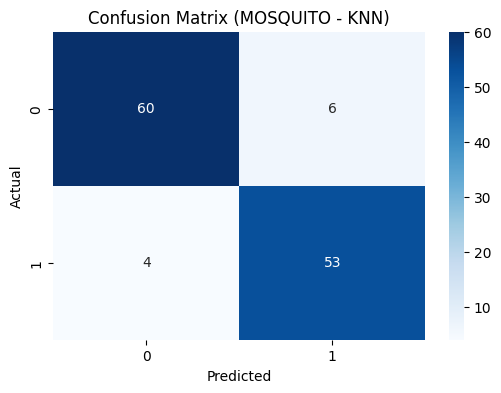

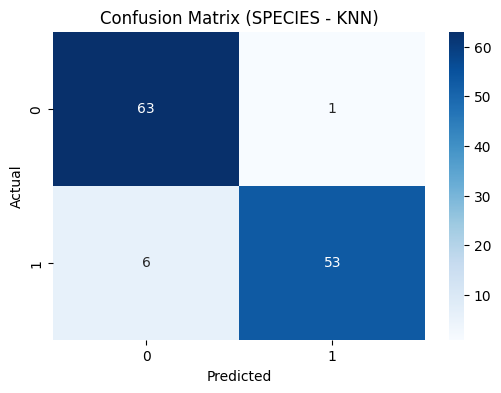

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Visualize confusion matrix for MOSQUITO (KNN)
y_mosquito_pred_knn = grid_search_knn_mosquito.predict(X_test_scaled)
plot_confusion_matrix(y_mosquito_test, y_mosquito_pred_knn, labels=[0, 1], title='Confusion Matrix (MOSQUITO - KNN)')

print()

# Visualize confusion matrix for SPECIES (KNN)
y_species_pred_knn = grid_search_knn_species.predict(X_test_scaled)
plot_confusion_matrix(y_species_test, y_species_pred_knn, labels=[0, 1], title='Confusion Matrix (SPECIES - KNN)')


**ADA BOOST CLASSIFIER**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
# Replace 'your_dataset.csv' with the actual filename
df = pd.read_csv('MALARIA.csv')

# Drop unnecessary columns
#df = df.drop(['MOSQUITO1', 'MOSQUITO2'], axis=1)
#df = df.drop(['MOSQUITO1', 'MOSQUITO2', 'MOSQUITO3', 'MOSQUITO4'], axis=1)
df = df.drop(['MOSQUITO1', 'MOSQUITO3', 'MOSQUITO4'], axis=1)


# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['MONTH', 'LOCATION'], drop_first=True)

# Feature engineering
df_encoded['AVG_TEMP_RANGE'] = df_encoded['AVG TEMP'] - df_encoded['MIN TEMP']
df_encoded['HUMIDITY_TEMP_INTERACTION'] = df_encoded['HUMIDITY'] * df_encoded['AVG TEMP']
df_encoded['TOT_CASES'] = df_encoded['MALE'] + df_encoded['FEMALE']

# Split the data into features (X) and target variables (y)
X = df_encoded.drop(['MOSQUITO', 'SPECIES'], axis=1)
y_mosquito = df_encoded['MOSQUITO']
y_species = df_encoded['SPECIES']

# Split the data into training and testing sets
X_train, X_test, y_mosquito_train, y_mosquito_test, y_species_train, y_species_test = train_test_split(
    X, y_mosquito, y_species, test_size=0.2, random_state=42
)

# Initialize the AdaBoost model
model_mosquito = AdaBoostClassifier(random_state=42)
model_species = AdaBoostClassifier(random_state=42)

# Train the AdaBoost model
model_mosquito.fit(X_train, y_mosquito_train)
model_species.fit(X_train, y_species_train)

# Make predictions
y_mosquito_pred = model_mosquito.predict(X_test)
y_species_pred = model_species.predict(X_test)

# Evaluate the model
accuracy_mosquito = accuracy_score(y_mosquito_test, y_mosquito_pred)
accuracy_species = accuracy_score(y_species_test, y_species_pred)

print(f'Accuracy (MOSQUITO): {accuracy_mosquito}')
print(f'Accuracy (SPECIES): {accuracy_species}')

# Print classification reports for more detailed metrics
print("Classification Report (MOSQUITO):\n", classification_report(y_mosquito_test, y_mosquito_pred))
print("Classification Report (SPECIES):\n", classification_report(y_species_test, y_species_pred))


Accuracy (MOSQUITO): 0.7967479674796748
Accuracy (SPECIES): 0.7317073170731707
Classification Report (MOSQUITO):
               precision    recall  f1-score   support

          Pf       0.76      0.91      0.83        66
          Pv       0.86      0.67      0.75        57

    accuracy                           0.80       123
   macro avg       0.81      0.79      0.79       123
weighted avg       0.81      0.80      0.79       123

Classification Report (SPECIES):
               precision    recall  f1-score   support

    imported       0.70      0.86      0.77        64
 indigenious       0.80      0.59      0.68        59

    accuracy                           0.73       123
   macro avg       0.75      0.73      0.72       123
weighted avg       0.74      0.73      0.73       123



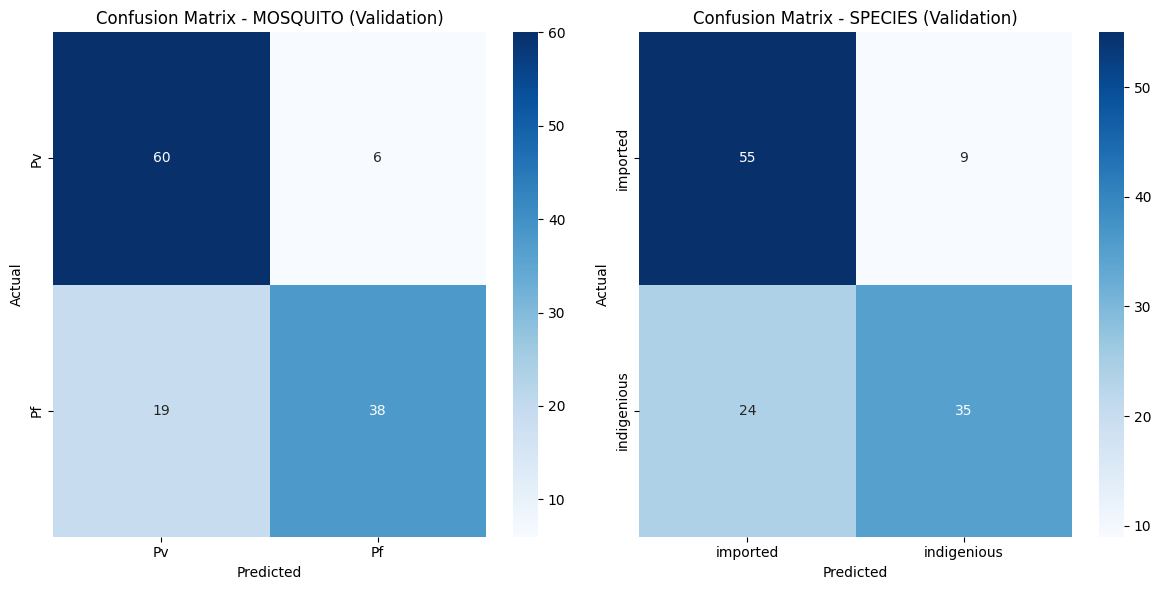

In [ ]:
# Create confusion matrices for validation
conf_matrix_mosquito = confusion_matrix(y_mosquito_test, y_mosquito_pred)
conf_matrix_species = confusion_matrix(y_species_test, y_species_pred)

# Visualize confusion matrices with a heatmap for validation
plt.figure(figsize=(12, 6))

# Plot for MOSQUITO
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_mosquito, annot=True, fmt='d', cmap='Blues', xticklabels=['Pv','Pf'], yticklabels=['Pv','Pf'])
plt.title('Confusion Matrix - MOSQUITO (Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot for SPECIES
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_species, annot=True, fmt='d', cmap='Blues', xticklabels=['imported', 'indigenious'], yticklabels=['imported', 'indigenious'])
plt.title('Confusion Matrix - SPECIES (Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

**XG BOOST**

Accuracy (MOSQUITO): 0.7642276422764228
Accuracy (SPECIES): 0.7642276422764228
Classification Report (MOSQUITO):
               precision    recall  f1-score   support

           0       0.79      0.76      0.78        66
           1       0.73      0.77      0.75        57

    accuracy                           0.76       123
   macro avg       0.76      0.76      0.76       123
weighted avg       0.77      0.76      0.76       123

Classification Report (SPECIES):
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        64
           1       0.77      0.73      0.75        59

    accuracy                           0.76       123
   macro avg       0.76      0.76      0.76       123
weighted avg       0.76      0.76      0.76       123



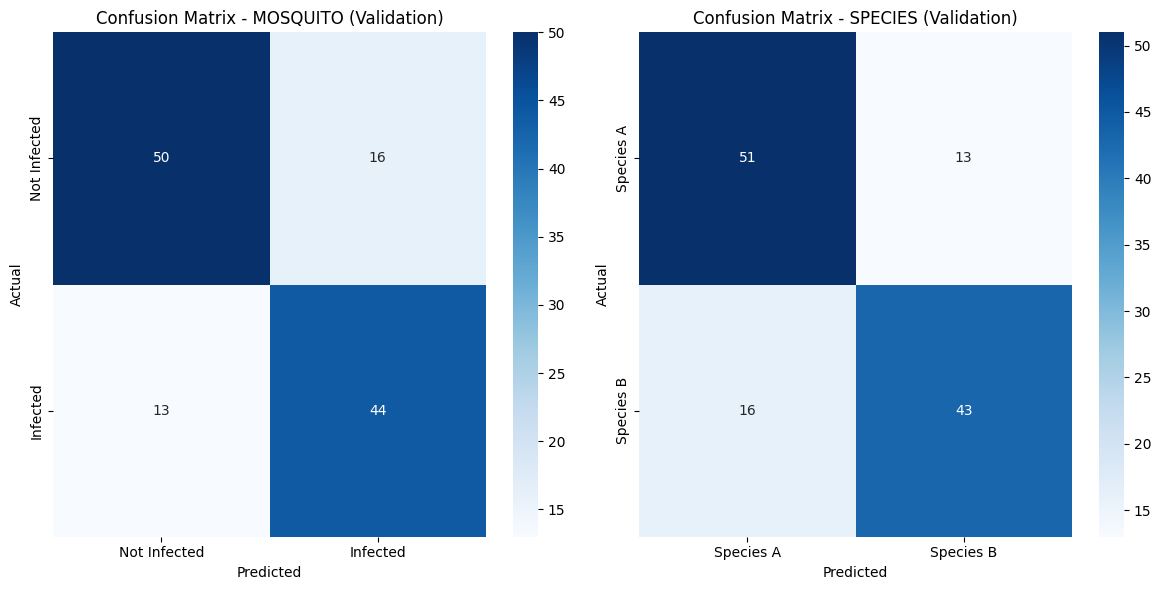

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Load the dataset
# Replace 'your_dataset.csv' with the actual filename
df = pd.read_csv('MALARIA.csv')

# Drop unnecessary columns
df = df.drop(['MOSQUITO1', 'MOSQUITO4'], axis=1)
#df = df.drop(['MOSQUITO1', 'MOSQUITO2', 'MOSQUITO3', 'MOSQUITO4'], axis=1)
#df = df.drop(['MOSQUITO1', 'MOSQUITO3', 'MOSQUITO4'], axis=1)


# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['MONTH', 'LOCATION'], drop_first=True)

# Feature engineering
df_encoded['AVG_TEMP_RANGE'] = df_encoded['AVG TEMP'] - df_encoded['MIN TEMP']
df_encoded['HUMIDITY_TEMP_INTERACTION'] = df_encoded['HUMIDITY'] * df_encoded['AVG TEMP']
df_encoded['TOT_CASES'] = df_encoded['MALE'] + df_encoded['FEMALE']

# Split the data into features (X) and target variables (y)
X = df_encoded.drop(['MOSQUITO', 'SPECIES'], axis=1)
y_mosquito = df_encoded['MOSQUITO']
y_species = df_encoded['SPECIES']

# Encode categorical labels to numerical values for y_mosquito
label_encoder_mosquito = LabelEncoder()
y_mosquito_encoded = label_encoder_mosquito.fit_transform(y_mosquito)

# Encode categorical labels to numerical values for y_species
label_encoder_species = LabelEncoder()
y_species_encoded = label_encoder_species.fit_transform(y_species)

# Split the data into training and testing sets
X_train, X_test, y_mosquito_train, y_mosquito_test, y_species_train, y_species_test = train_test_split(
    X, y_mosquito_encoded, y_species_encoded, test_size=0.2, random_state=42
)

# Initialize the XGBoost models
model_mosquito = XGBClassifier(random_state=42)
model_species = XGBClassifier(random_state=42)

# Train the XGBoost models
model_mosquito.fit(X_train, y_mosquito_train)
model_species.fit(X_train, y_species_train)

# Make predictions
y_mosquito_pred = model_mosquito.predict(X_test)
y_species_pred = model_species.predict(X_test)

# Evaluate the models
accuracy_mosquito = accuracy_score(y_mosquito_test, y_mosquito_pred)
accuracy_species = accuracy_score(y_species_test, y_species_pred)

print(f'Accuracy (MOSQUITO): {accuracy_mosquito}')
print(f'Accuracy (SPECIES): {accuracy_species}')

# Print classification reports for more detailed metrics
print("Classification Report (MOSQUITO):\n", classification_report(y_mosquito_test, y_mosquito_pred))
print("Classification Report (SPECIES):\n", classification_report(y_species_test, y_species_pred))

# Create confusion matrices for validation
conf_matrix_mosquito = confusion_matrix(y_mosquito_test, y_mosquito_pred)
conf_matrix_species = confusion_matrix(y_species_test, y_species_pred)

# Visualize confusion matrices with a heatmap for validation
plt.figure(figsize=(12, 6))

# Plot for MOSQUITO
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_mosquito, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Infected', 'Infected'], yticklabels=['Not Infected', 'Infected'])
plt.title('Confusion Matrix - MOSQUITO (Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot for SPECIES
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_species, annot=True, fmt='d', cmap='Blues', xticklabels=['Species A', 'Species B'], yticklabels=['Species A', 'Species B'])
plt.title('Confusion Matrix - SPECIES (Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


**Naive bayes**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
# Replace 'your_dataset.csv' with the actual path or URL of your dataset file
df = pd.read_csv('MALARIA.csv')

# Select relevant features for prediction
features = df[['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ', 'WIND', 'AGE CATEGORY', 'MALE', 'FEMALE', 'LOCATION', 'WEEK', 'MONTH','MOSQUITO1','MOSQUITO4','MOSQUITO2','MOSQUITO3']]

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['AGE CATEGORY', 'LOCATION', 'MONTH','MOSQUITO1','MOSQUITO4','MOSQUITO2','MOSQUITO3'])

# Target variables
mosquito_target = df['MOSQUITO']
species_target = df['SPECIES']

# Split the data into training and testing sets
features_train, features_test, mosquito_target_train, mosquito_target_test, species_target_train, species_target_test = train_test_split(
    features, mosquito_target, species_target, test_size=0.2, random_state=42
)

# Initialize and train the Naive Bayes model for MOSQUITO prediction
mosquito_classifier = MultinomialNB()
mosquito_classifier.fit(features_train, mosquito_target_train)

# Predict MOSQUITO for the test set
mosquito_predictions = mosquito_classifier.predict(features_test)

# Evaluate MOSQUITO model
mosquito_accuracy = accuracy_score(mosquito_target_test, mosquito_predictions)
print(f'MOSQUITO Prediction Accuracy: {mosquito_accuracy:.2f}')
print(classification_report(mosquito_target_test, mosquito_predictions))

# Initialize and train the Naive Bayes model for SPECIES prediction
species_classifier = MultinomialNB()
species_classifier.fit(features_train, species_target_train)

# Predict SPECIES for the test set
species_predictions = species_classifier.predict(features_test)

# Evaluate SPECIES model
species_accuracy = accuracy_score(species_target_test, species_predictions)
print(f'SPECIES Prediction Accuracy: {species_accuracy:.2f}')
print(classification_report(species_target_test, species_predictions))


MOSQUITO Prediction Accuracy: 0.72
              precision    recall  f1-score   support

          Pf       0.75      0.73      0.74        66
          Pv       0.69      0.72      0.71        57

    accuracy                           0.72       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.72      0.72      0.72       123

SPECIES Prediction Accuracy: 0.49
              precision    recall  f1-score   support

    imported       0.51      0.58      0.54        64
 indigenious       0.46      0.39      0.42        59

    accuracy                           0.49       123
   macro avg       0.48      0.48      0.48       123
weighted avg       0.48      0.49      0.48       123



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
# Replace 'your_dataset.csv' with the actual path or URL of your dataset file
df = pd.read_csv('MALARIA.csv')

# Select relevant features for prediction
features = df[['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ','LOCATION', 'WIND', 'AGE CATEGORY', 'MALE', 'FEMALE', 'WEEK', 'MONTH','MOSQUITO2','MOSQUITO3']]

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['AGE CATEGORY', 'MONTH','LOCATION','MOSQUITO2','MOSQUITO3'])

# Target variables
mosquito_target = df['MOSQUITO']
species_target = df['SPECIES']

# Split the data into training and testing sets
features_train, features_test, mosquito_target_train, mosquito_target_test, species_target_train, species_target_test = train_test_split(
    features, mosquito_target, species_target, test_size=0.5, random_state=40
)

# Feature scaling
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Feature selection using SelectKBest with ANOVA F-statistic
k_best = 10  # Experiment with different values
selector = SelectKBest(f_classif, k=k_best)
features_train_selected = selector.fit_transform(features_train_scaled, mosquito_target_train)
features_test_selected = selector.transform(features_test_scaled)

# Initialize and train the Naive Bayes model for MOSQUITO prediction
mosquito_classifier = GaussianNB()
mosquito_classifier.fit(features_train_selected, mosquito_target_train)

# Predict MOSQUITO for the test set
mosquito_predictions = mosquito_classifier.predict(features_test_selected)

# Evaluate MOSQUITO model
mosquito_accuracy = accuracy_score(mosquito_target_test, mosquito_predictions)
print(f'MOSQUITO Prediction Accuracy: {mosquito_accuracy:.2f}')
print(classification_report(mosquito_target_test, mosquito_predictions))

# Initialize and train the Naive Bayes model for SPECIES prediction
species_classifier = GaussianNB()
species_classifier.fit(features_train_selected, species_target_train)

# Predict SPECIES for the test set
species_predictions = species_classifier.predict(features_test_selected)

# Evaluate SPECIES model
species_accuracy = accuracy_score(species_target_test, species_predictions)
print(f'SPECIES Prediction Accuracy: {species_accuracy:.2f}')
print(classification_report(species_target_test, species_predictions))



MOSQUITO Prediction Accuracy: 0.79
              precision    recall  f1-score   support

          Pf       0.76      0.87      0.81       157
          Pv       0.83      0.70      0.76       149

    accuracy                           0.79       306
   macro avg       0.79      0.79      0.79       306
weighted avg       0.79      0.79      0.79       306

SPECIES Prediction Accuracy: 0.75
              precision    recall  f1-score   support

    imported       0.72      0.82      0.76       154
 indigenious       0.78      0.67      0.72       152

    accuracy                           0.75       306
   macro avg       0.75      0.74      0.74       306
weighted avg       0.75      0.75      0.74       306



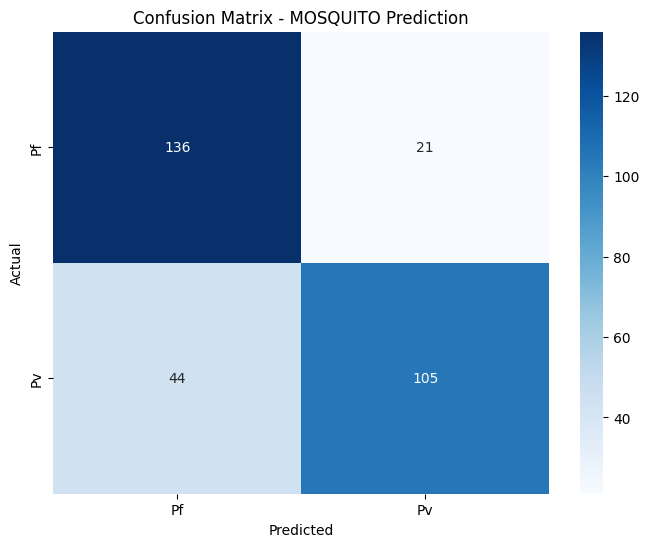

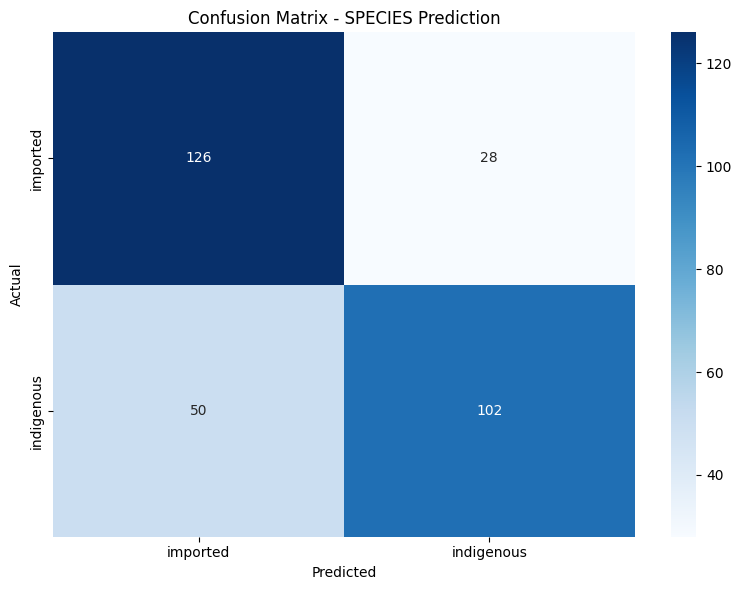

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion Matrix Visualization for MOSQUITO
mosquito_cm = confusion_matrix(mosquito_target_test, mosquito_predictions)
mosquito_labels = ['Pf', 'Pv']

plt.figure(figsize=(8, 6))
sns.heatmap(mosquito_cm, annot=True, fmt='d', cmap='Blues', xticklabels=mosquito_labels, yticklabels=mosquito_labels)
plt.title('Confusion Matrix - MOSQUITO Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix Visualization for SPECIES
species_cm = confusion_matrix(species_target_test, species_predictions)
species_labels = ['imported', 'indigenous']


plt.figure(figsize=(8, 6))
sns.heatmap(species_cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_labels, yticklabels=species_labels)
plt.title('Confusion Matrix - SPECIES Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

**ANN**

<ipython-input-90-bb108d23b4bd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['LOCATION'] = label_encoder.fit_transform(features['LOCATION'])
<ipython-input-90-bb108d23b4bd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['MONTH'] = label_encoder.fit_transform(features['MONTH'])
<ipython-input-90-bb108d23b4bd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Epoch 1/60
7/7 [==============================] - 2s 55ms/step - loss: 0.7279 - accuracy: 0.5091 - val_loss: 0.6435 - val_accuracy: 0.7483
Epoch 2/60
7/7 [==============================] - 0s 15ms/step - loss: 0.6697 - accuracy: 0.6091 - val_loss: 0.6157 - val_accuracy: 0.7551
Epoch 3/60
7/7 [==============================] - 0s 14ms/step - loss: 0.6647 - accuracy: 0.6182 - val_loss: 0.5874 - val_accuracy: 0.7211
Epoch 4/60
7/7 [==============================] - 0s 14ms/step - loss: 0.6415 - accuracy: 0.6091 - val_loss: 0.5612 - val_accuracy: 0.7347
Epoch 5/60
7/7 [==============================] - 0s 12ms/step - loss: 0.5889 - accuracy: 0.6682 - val_loss: 0.5344 - val_accuracy: 0.7687
Epoch 6/60
7/7 [==============================] - 0s 13ms/step - loss: 0.5280 - accuracy: 0.7818 - val_loss: 0.5116 - val_accuracy: 0.7279
Epoch 7/60
7/7 [==============================] - 0s 13ms/step - loss: 0.5282 - accuracy: 0.7318 - val_loss: 0.4871 - val_accuracy: 0.7619
Epoch 8/60
7/7 [===========

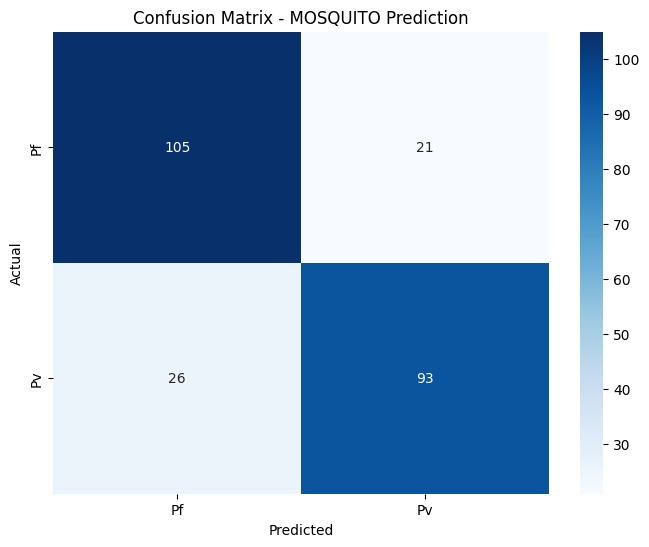

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_dataset.csv' with the actual path or URL of your dataset file
df = pd.read_csv('MALARIA.csv')

# Select relevant features for prediction
features = df[['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ', 'WIND', 'AGE CATEGORY', 'MALE', 'FEMALE', 'LOCATION', 'WEEK', 'MONTH','MOSQUITO2','MOSQUITO3']]

# Convert categorical features to numerical using label encoding
label_encoder = LabelEncoder()
features['LOCATION'] = label_encoder.fit_transform(features['LOCATION'])
features['MONTH'] = label_encoder.fit_transform(features['MONTH'])
features['MOSQUITO1'] = label_encoder.fit_transform(features['MOSQUITO2'])
features['MOSQUITO4'] = label_encoder.fit_transform(features['MOSQUITO3'])


# Target variables
mosquito_target = df['MOSQUITO']
species_target = df['SPECIES']

# Convert target variables to numerical using label encoding
mosquito_label_encoder = LabelEncoder()
mosquito_target_encoded = mosquito_label_encoder.fit_transform(mosquito_target)

species_label_encoder = LabelEncoder()
species_target_encoded = species_label_encoder.fit_transform(species_target)

# Split the data into training and testing sets
features_train, features_test, mosquito_target_train, mosquito_target_test, species_target_train, species_target_test = train_test_split(
    features, mosquito_target_encoded, species_target_encoded, test_size=0.4, random_state=40
)

# Feature scaling
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Hyperparameter tuning
learning_rate = 0.001
num_epochs = 100
batch_size = 32
dropout_rate = 0.5

# Build the ANN model for MOSQUITO prediction
mosquito_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(features_train_scaled.shape[1],)),
    layers.Dropout(dropout_rate),
    layers.Dense(64, activation='sigmoid'),
    layers.Dropout(dropout_rate),
    layers.Dense(1, activation='sigmoid')
])

mosquito_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mosquito_model.fit(features_train_scaled, mosquito_target_train, epochs=60, batch_size=32, validation_split=0.4, verbose=1)

# Predict MOSQUITO for the test set
mosquito_predictions_proba = mosquito_model.predict(features_test_scaled)
mosquito_predictions = (mosquito_predictions_proba > 0.4).astype(int)

# Evaluate MOSQUITO model
mosquito_accuracy = accuracy_score(mosquito_target_test, mosquito_predictions)
print(f'MOSQUITO Prediction Accuracy: {mosquito_accuracy:.2f}')
print(classification_report(mosquito_target_test, mosquito_predictions))

# Confusion Matrix Visualization for MOSQUITO
mosquito_cm = confusion_matrix(mosquito_target_test, mosquito_predictions)
mosquito_labels = ['Pf', 'Pv']

plt.figure(figsize=(8, 6))
sns.heatmap(mosquito_cm, annot=True, fmt='d', cmap='Blues', xticklabels=mosquito_labels, yticklabels=mosquito_labels)
plt.title('Confusion Matrix - MOSQUITO Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




Epoch 1/100
7/7 [==============================] - 2s 70ms/step - loss: 0.6152 - accuracy: 0.6545 - val_loss: 0.5407 - val_accuracy: 0.7619
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 0.5673 - accuracy: 0.7227 - val_loss: 0.4734 - val_accuracy: 0.7619
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.4784 - accuracy: 0.7500 - val_loss: 0.4354 - val_accuracy: 0.7619
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.4350 - accuracy: 0.7864 - val_loss: 0.4121 - val_accuracy: 0.7347
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 0.4345 - accuracy: 0.7818 - val_loss: 0.3966 - val_accuracy: 0.7551
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 0.3648 - accuracy: 0.8182 - val_loss: 0.3858 - val_accuracy: 0.7483
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.3612 - accuracy: 0.7909 - val_loss: 0.3787 - val_accuracy: 0.7551
Epoch 8/100
7/7 [===

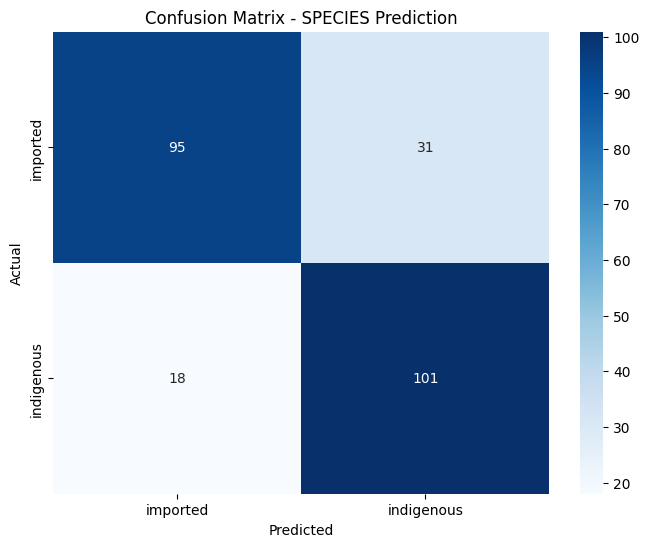

In [ ]:
# Hyperparameter tuning
learning_rate = 0.001
num_epochs = 100
batch_size = 32
dropout_rate = 0.5

# Build the ANN model for MOSQUITO prediction
mosquito_model = keras.Sequential([
    layers.Dense(128, activation='tanh', input_shape=(features_train_scaled.shape[1],)),
    layers.Dropout(dropout_rate),
    layers.Dense(64, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with chosen optimizer and learning rate
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
mosquito_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mosquito_history = mosquito_model.fit(features_train_scaled, mosquito_target_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.4, verbose=1)

# Predict SPECIES for the test set
species_predictions_proba = species_model.predict(features_test_scaled)
species_predictions = (species_predictions_proba > 0.5).astype(int)

# Evaluate SPECIES model
species_accuracy = accuracy_score(species_target_test, species_predictions)
print(f'SPECIES Prediction Accuracy: {species_accuracy:.2f}')
print(classification_report(species_target_test, species_predictions))

# Confusion Matrix Visualization for SPECIES
species_cm = confusion_matrix(species_target_test, species_predictions)
species_labels = ['imported', 'indigenous']

plt.figure(figsize=(8, 6))
sns.heatmap(species_cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_labels, yticklabels=species_labels)
plt.title('Confusion Matrix - SPECIES Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**SVM**

MOSQUITO Prediction Accuracy: 0.49
              precision    recall  f1-score   support

          Pf       0.50      0.71      0.59       126
          Pv       0.45      0.24      0.32       119

    accuracy                           0.49       245
   macro avg       0.47      0.48      0.45       245
weighted avg       0.47      0.49      0.46       245



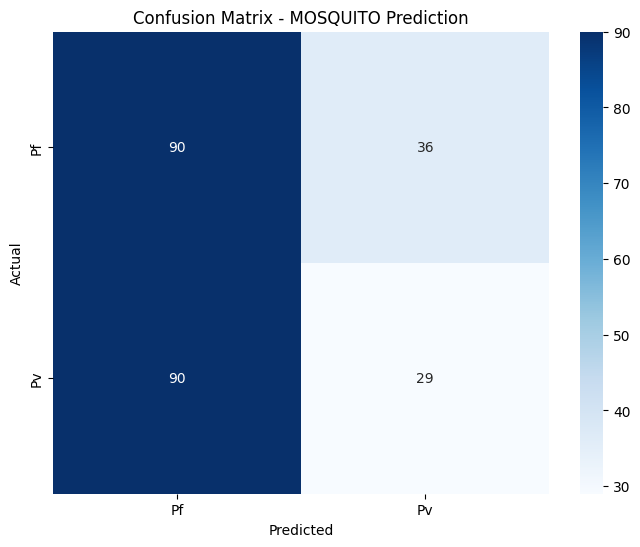

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('MALARIA.csv')

# Select relevant features for prediction
features = df[['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ', 'WIND', 'AGE CATEGORY', 'MALE', 'FEMALE']]

# Convert categorical features to numerical using label encoding
label_encoder = LabelEncoder()
df['LOCATION'] = label_encoder.fit_transform(df['LOCATION'])
df['MONTH'] = label_encoder.fit_transform(df['MONTH'])
df['MOSQUITO1'] = label_encoder.fit_transform(df['MOSQUITO1'])
df['MOSQUITO2'] = label_encoder.fit_transform(df['MOSQUITO2'])
df['MOSQUITO3'] = label_encoder.fit_transform(df['MOSQUITO3'])
df['MOSQUITO4'] = label_encoder.fit_transform(df['MOSQUITO4'])

# Target variables
mosquito_target = df['MOSQUITO']
species_target = df['SPECIES']

# Split the data into training and testing sets
features_train, features_test, mosquito_target_train, mosquito_target_test, species_target_train, species_target_test = train_test_split(
    features, mosquito_target, species_target, test_size=0.4, random_state=40
)

# Feature scaling
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Build and train the SVM model for MOSQUITO prediction
mosquito_svm = SVC(kernel='linear', C=1.0,class_weight='balanced',degree=3,decision_function_shape='ovo',gamma=0.1,random_state=40)
mosquito_svm.fit(features_train_scaled, mosquito_target_train)

# Predict MOSQUITO for the test set
mosquito_predictions = mosquito_svm.predict(features_test_scaled)

# Evaluate MOSQUITO model
mosquito_accuracy = accuracy_score(mosquito_target_test, mosquito_predictions)
print(f'MOSQUITO Prediction Accuracy: {mosquito_accuracy:.2f}')
print(classification_report(mosquito_target_test, mosquito_predictions))

# Confusion Matrix Visualization for MOSQUITO
mosquito_cm = confusion_matrix(mosquito_target_test, mosquito_predictions)
mosquito_labels = ['Pf', 'Pv']

plt.figure(figsize=(8, 6))
sns.heatmap(mosquito_cm, annot=True, fmt='d', cmap='Blues', xticklabels=mosquito_labels, yticklabels=mosquito_labels)
plt.title('Confusion Matrix - MOSQUITO Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



SPECIES Prediction Accuracy: 0.50
              precision    recall  f1-score   support

    imported       0.51      0.42      0.46       126
 indigenious       0.49      0.58      0.53       119

    accuracy                           0.50       245
   macro avg       0.50      0.50      0.50       245
weighted avg       0.50      0.50      0.49       245



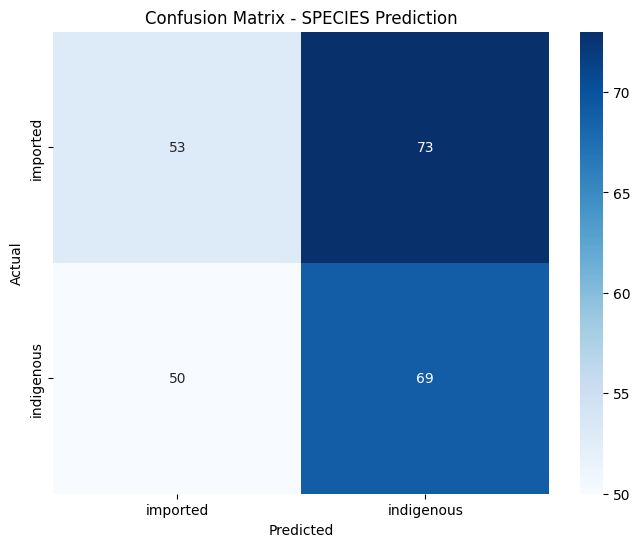

In [ ]:
# Build and train the SVM model for SPECIES prediction
mosquito_svm = SVC(kernel='linear', C=1.0,class_weight='balanced',decision_function_shape='ovo',random_state=40)
species_svm.fit(features_train_scaled, species_target_train)

# Predict SPECIES for the test set
species_predictions = species_svm.predict(features_test_scaled)

# Evaluate SPECIES model
species_accuracy = accuracy_score(species_target_test, species_predictions)
print(f'SPECIES Prediction Accuracy: {species_accuracy:.2f}')
print(classification_report(species_target_test, species_predictions))

# Confusion Matrix Visualization for SPECIES
species_cm = confusion_matrix(species_target_test, species_predictions)
species_labels = ['imported', 'indigenous']

plt.figure(figsize=(8, 6))
sns.heatmap(species_cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_labels, yticklabels=species_labels)
plt.title('Confusion Matrix - SPECIES Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**LDA**

MOSQUITO Prediction Accuracy: 0.56
              precision    recall  f1-score   support

          Pf       0.64      0.42      0.51        66
          Pv       0.52      0.72      0.60        57

    accuracy                           0.56       123
   macro avg       0.58      0.57      0.56       123
weighted avg       0.58      0.56      0.55       123



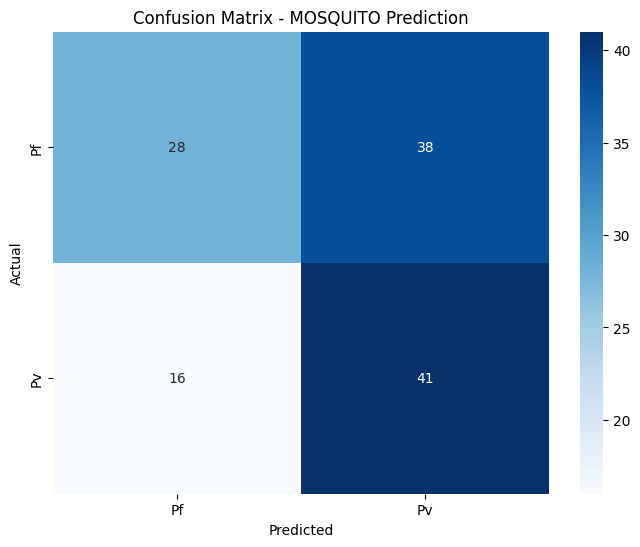

SPECIES Prediction Accuracy: 0.57
              precision    recall  f1-score   support

    imported       0.61      0.47      0.53        64
 indigenious       0.54      0.68      0.60        59

    accuracy                           0.57       123
   macro avg       0.58      0.57      0.57       123
weighted avg       0.58      0.57      0.56       123



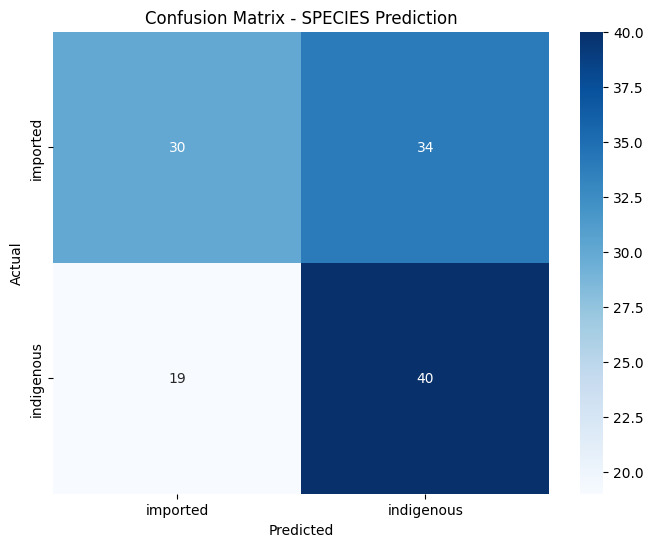

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('MALARIA.csv')  # Replace with your actual dataset path

# Select relevant features for prediction
features = df[['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ', 'WIND', 'AGE CATEGORY', 'MALE', 'FEMALE']]

# Convert categorical features to numerical using label encoding
label_encoder = LabelEncoder()
df['LOCATION'] = label_encoder.fit_transform(df['LOCATION'])
df['MONTH'] = label_encoder.fit_transform(df['MONTH'])
df['MOSQUITO1'] = label_encoder.fit_transform(df['MOSQUITO1'])
df['MOSQUITO2'] = label_encoder.fit_transform(df['MOSQUITO2'])
df['MOSQUITO3'] = label_encoder.fit_transform(df['MOSQUITO3'])
df['MOSQUITO4'] = label_encoder.fit_transform(df['MOSQUITO4'])

# Target variables
mosquito_target = df['MOSQUITO']
species_target = df['SPECIES']

# Split the data into training and testing sets
features_train, features_test, mosquito_target_train, mosquito_target_test, species_target_train, species_target_test = train_test_split(
    features, mosquito_target, species_target, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Build and train the LDA model for MOSQUITO prediction
mosquito_lda = LinearDiscriminantAnalysis()
mosquito_lda.fit(features_train_scaled, mosquito_target_train)

# Predict MOSQUITO for the test set
mosquito_predictions = mosquito_lda.predict(features_test_scaled)

# Evaluate MOSQUITO model
mosquito_accuracy = accuracy_score(mosquito_target_test, mosquito_predictions)
print(f'MOSQUITO Prediction Accuracy: {mosquito_accuracy:.2f}')
print(classification_report(mosquito_target_test, mosquito_predictions))

# Confusion Matrix Visualization for MOSQUITO
mosquito_cm = confusion_matrix(mosquito_target_test, mosquito_predictions)
mosquito_labels = ['Pf', 'Pv']

plt.figure(figsize=(8, 6))
sns.heatmap(mosquito_cm, annot=True, fmt='d', cmap='Blues', xticklabels=mosquito_labels, yticklabels=mosquito_labels)
plt.title('Confusion Matrix - MOSQUITO Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Build and train the LDA model for SPECIES prediction
species_lda = LinearDiscriminantAnalysis()
species_lda.fit(features_train_scaled, species_target_train)

# Predict SPECIES for the test set
species_predictions = species_lda.predict(features_test_scaled)

# Evaluate SPECIES model
species_accuracy = accuracy_score(species_target_test, species_predictions)
print(f'SPECIES Prediction Accuracy: {species_accuracy:.2f}')
print(classification_report(species_target_test, species_predictions))

# Confusion Matrix Visualization for SPECIES
species_cm = confusion_matrix(species_target_test, species_predictions)
species_labels = ['imported', 'indigenous']

plt.figure(figsize=(8, 6))
sns.heatmap(species_cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_labels, yticklabels=species_labels)
plt.title('Confusion Matrix - SPECIES Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**QDA**

MOSQUITO Prediction Accuracy: 0.58
              precision    recall  f1-score   support

          Pf       0.60      0.64      0.62        66
          Pv       0.55      0.51      0.53        57

    accuracy                           0.58       123
   macro avg       0.57      0.57      0.57       123
weighted avg       0.58      0.58      0.58       123



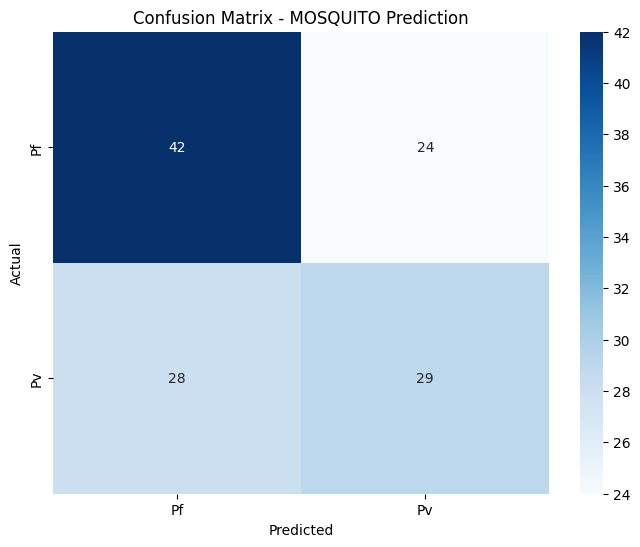


SPECIES Prediction Accuracy: 0.57
              precision    recall  f1-score   support

    imported       0.58      0.64      0.61        64
 indigenious       0.56      0.49      0.52        59

    accuracy                           0.57       123
   macro avg       0.57      0.57      0.56       123
weighted avg       0.57      0.57      0.57       123



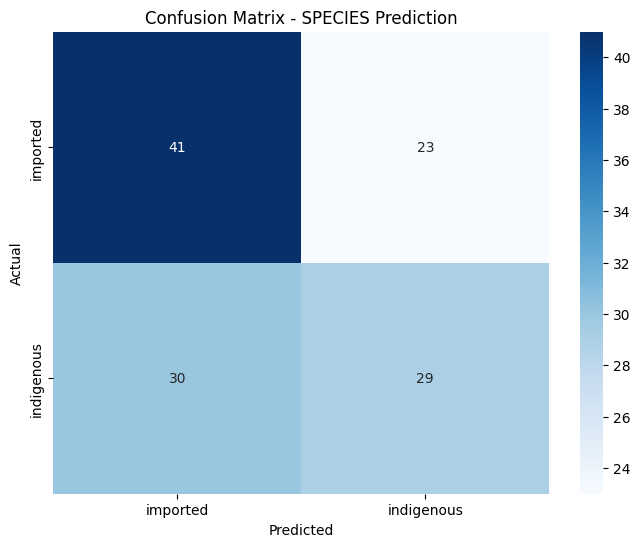

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('MALARIA.csv')  # Replace with your actual dataset path

# Select relevant features for prediction
features = df[['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ', 'WIND', 'AGE CATEGORY', 'MALE', 'FEMALE']]

# Convert categorical features to numerical using label encoding
label_encoder = LabelEncoder()
#df['LOCATION'] = label_encoder.fit_transform(df['LOCATION'])
df['MONTH'] = label_encoder.fit_transform(df['MONTH'])
df['MOSQUITO1'] = label_encoder.fit_transform(df['MOSQUITO1'])
df['MOSQUITO2'] = label_encoder.fit_transform(df['MOSQUITO2'])
df['MOSQUITO3'] = label_encoder.fit_transform(df['MOSQUITO3'])
df['MOSQUITO4'] = label_encoder.fit_transform(df['MOSQUITO4'])
# Target variables
mosquito_target = df['MOSQUITO']
species_target = df['SPECIES']

# Split the data into training and testing sets
features_train, features_test, mosquito_target_train, mosquito_target_test, species_target_train, species_target_test = train_test_split(
    features, mosquito_target, species_target, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Build and train the QDA model for MOSQUITO prediction
mosquito_qda = QuadraticDiscriminantAnalysis()
mosquito_qda.fit(features_train_scaled, mosquito_target_train)

# Predict MOSQUITO for the test set
mosquito_predictions = mosquito_qda.predict(features_test_scaled)

# Evaluate MOSQUITO model
mosquito_accuracy = accuracy_score(mosquito_target_test, mosquito_predictions)
print(f'MOSQUITO Prediction Accuracy: {mosquito_accuracy:.2f}')
print(classification_report(mosquito_target_test, mosquito_predictions))

# Confusion Matrix Visualization for MOSQUITO
mosquito_cm = confusion_matrix(mosquito_target_test, mosquito_predictions)
mosquito_labels = ['Pf', 'Pv']

plt.figure(figsize=(8, 6))
sns.heatmap(mosquito_cm, annot=True, fmt='d', cmap='Blues', xticklabels=mosquito_labels, yticklabels=mosquito_labels)
plt.title('Confusion Matrix - MOSQUITO Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print()
# Build and train the QDA model for SPECIES prediction
species_qda = QuadraticDiscriminantAnalysis()
species_qda.fit(features_train_scaled, species_target_train)

# Predict SPECIES for the test set
species_predictions = species_qda.predict(features_test_scaled)

# Evaluate SPECIES model
species_accuracy = accuracy_score(species_target_test, species_predictions)
print(f'SPECIES Prediction Accuracy: {species_accuracy:.2f}')
print(classification_report(species_target_test, species_predictions))

# Confusion Matrix Visualization for SPECIES
species_cm = confusion_matrix(species_target_test, species_predictions)
species_labels = ['imported', 'indigenous']

plt.figure(figsize=(8, 6))
sns.heatmap(species_cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_labels, yticklabels=species_labels)
plt.title('Confusion Matrix - SPECIES Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


****GPC

MOSQUITO Prediction Accuracy: 0.51
              precision    recall  f1-score   support

          Pf       0.48      0.46      0.47       117
          Pv       0.53      0.55      0.54       128

    accuracy                           0.51       245
   macro avg       0.50      0.50      0.50       245
weighted avg       0.51      0.51      0.51       245



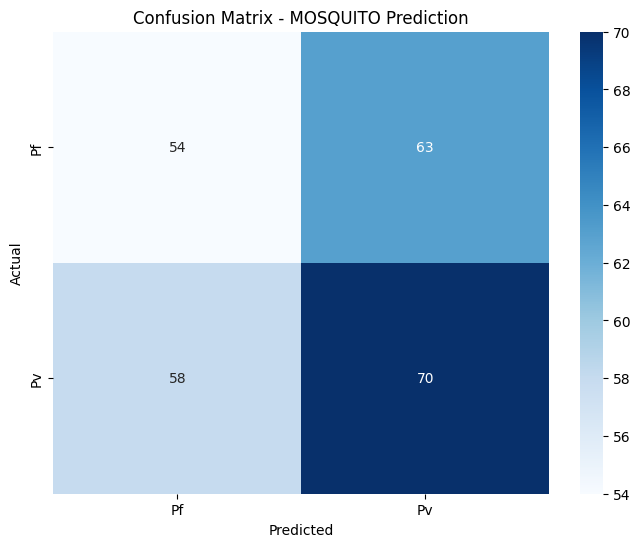

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


SPECIES Prediction Accuracy: 0.50
              precision    recall  f1-score   support

    imported       0.52      0.46      0.49       127
 indigenious       0.49      0.55      0.52       118

    accuracy                           0.50       245
   macro avg       0.50      0.50      0.50       245
weighted avg       0.50      0.50      0.50       245



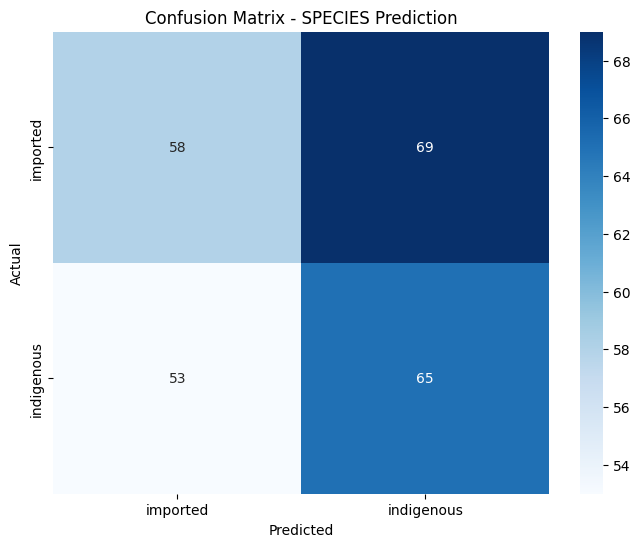

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('MALARIA.csv')  # Replace with your actual dataset path

# Select relevant features for prediction
features = df[['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ', 'WIND', 'AGE CATEGORY', 'MALE', 'FEMALE']]

# Convert categorical features to numerical using label encoding
label_encoder = LabelEncoder()
df['LOCATION'] = label_encoder.fit_transform(df['LOCATION'])
df['MONTH'] = label_encoder.fit_transform(df['MONTH'])
df['MOSQUITO1'] = label_encoder.fit_transform(df['MOSQUITO1'])
df['MOSQUITO2'] = label_encoder.fit_transform(df['MOSQUITO2'])
df['MOSQUITO3'] = label_encoder.fit_transform(df['MOSQUITO3'])
df['MOSQUITO4'] = label_encoder.fit_transform(df['MOSQUITO4'])

# Target variables
mosquito_target = df['MOSQUITO']
species_target = df['SPECIES']

# Split the data into training and testing sets
features_train, features_test, mosquito_target_train, mosquito_target_test, species_target_train, species_target_test = train_test_split(
    features, mosquito_target, species_target, test_size=0.4, random_state=42
)

# Feature scaling
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Define the Gaussian Process kernel
kernel = 1.0 * RBF()

# Build and train the GPC model for MOSQUITO prediction
mosquito_gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
mosquito_gpc.fit(features_train_scaled, mosquito_target_train)

# Predict MOSQUITO for the test set
mosquito_predictions = mosquito_gpc.predict(features_test_scaled)

# Evaluate MOSQUITO model
mosquito_accuracy = accuracy_score(mosquito_target_test, mosquito_predictions)
print(f'MOSQUITO Prediction Accuracy: {mosquito_accuracy:.2f}')
print(classification_report(mosquito_target_test, mosquito_predictions))

# Confusion Matrix Visualization for MOSQUITO
mosquito_cm = confusion_matrix(mosquito_target_test, mosquito_predictions)
mosquito_labels = ['Pf', 'Pv']

plt.figure(figsize=(8, 6))
sns.heatmap(mosquito_cm, annot=True, fmt='d', cmap='Blues', xticklabels=mosquito_labels, yticklabels=mosquito_labels)
plt.title('Confusion Matrix - MOSQUITO Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print()
# Build and train the GPC model for SPECIES prediction
species_gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
species_gpc.fit(features_train_scaled, species_target_train)

# Predict SPECIES for the test set
species_predictions = species_gpc.predict(features_test_scaled)

# Evaluate SPECIES model
species_accuracy = accuracy_score(species_target_test, species_predictions)
print(f'SPECIES Prediction Accuracy: {species_accuracy:.2f}')
print(classification_report(species_target_test, species_predictions))

# Confusion Matrix Visualization for SPECIES
species_cm = confusion_matrix(species_target_test, species_predictions)
species_labels = ['imported', 'indigenous']

plt.figure(figsize=(8, 6))
sns.heatmap(species_cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_labels, yticklabels=species_labels)
plt.title('Confusion Matrix - SPECIES Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
